# Import Libraries

In [23]:
import pandas as pd
from matplotlib import pyplot as plt

# Import Dataset

In [24]:
df = pd.read_csv('final.csv')

# Dataset Visualization

In [25]:
df.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,4b65dfadb1742b415136d191973da00d,42,385,3,58,24,0,0,0,Yes,...,0,4,18,0,2,1,87,87,66,Yes
1,3dc4e0a208acbfd793d585d61e4da5cd,85,180,1,77,0,0,0,0,No,...,0,0,0,0,0,0,17,17,3,Yes
2,23e106637070d37b8d8e1b681fdb54df,37,279,6,50,12,0,0,0,Yes,...,0,16,0,0,1,0,48,49,39,No
3,928fddf2335bb4d1211357b0c5abfad8,295,311,12,349,12,0,0,0,Yes,...,0,12,1,1,1,1,172,174,414,No
4,3d95d975bb58268c5664bd05166d14db,102,180,2,24,0,0,0,-1,unclear,...,1,0,1,0,0,0,10,10,4,Yes


In [26]:
# Check for same PDFs

print(len(df))
print(len(df['MD5']))

210339
210339


In [27]:
temp = df.copy()

In [28]:
print(len(temp))
print(len(temp['MD5'].unique()))

210339
124499


In [29]:
print(len(temp[temp['Malicious'] == 'Yes']))
print(len(temp[temp['Malicious'] == 'No']))

79242
131097


In [7]:
temp = temp.drop_duplicates(subset=['MD5'])
temp = temp.drop(columns=['MD5'])

In [8]:
# Removing duplicates

print(len(temp))
temp.drop_duplicates
print(len(temp))

102044
102044


In [9]:
temp.columns

Index(['pdfsize', 'metadata size', 'pages', 'xref length', 'title characters',
       'isEncrypted', 'embedded files', 'images', 'contains text', 'header',
       'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref',
       'pageno', 'Encrypt', 'ObjStm', 'JS', 'JavaScript', 'AA', 'OpenAction',
       'AcroForm', 'JBIG2Decode', 'RichMedia', 'Launch', 'EmbeddedFile', 'XFA',
       'URI', 'Colors', 'JS_Obfuscated', 'JavaScript_Obfuscated',
       'AA_Obfuscated', 'OpenAction_Obfuscated', 'AcroForm_Obfuscated',
       'JBIG2Decode_Obfuscated', 'RichMedia_Obfuscated', 'Launch_Obfuscated',
       'EmbeddedFile_Obfuscated', 'XFA_Obfuscated', 'pageno_Obfuscated',
       '%EOF', '/Producer', '/ProcSet', '/ID', '/S', '/CreationDate', '/Font',
       '/XObject', '/Widget', '/FontDescriptor', '/Rect', '/ModDate', '/Info',
       '/XML', 'dict_start', 'dict_end', 'comments', 'Malicious'],
      dtype='object')

## Analysis of isEncrypted Column

In [10]:
temp['isEncrypted'].value_counts()

isEncrypted
 0    100752
 1      1288
-1         4
Name: count, dtype: int64

In [11]:
temp[temp['Malicious'] == 'Yes']['isEncrypted'].value_counts()

isEncrypted
 0    68023
 1       90
-1        3
Name: count, dtype: int64

In [12]:
temp[temp['Malicious'] == 'No']['isEncrypted'].value_counts()

isEncrypted
 0    32729
 1     1198
-1        1
Name: count, dtype: int64

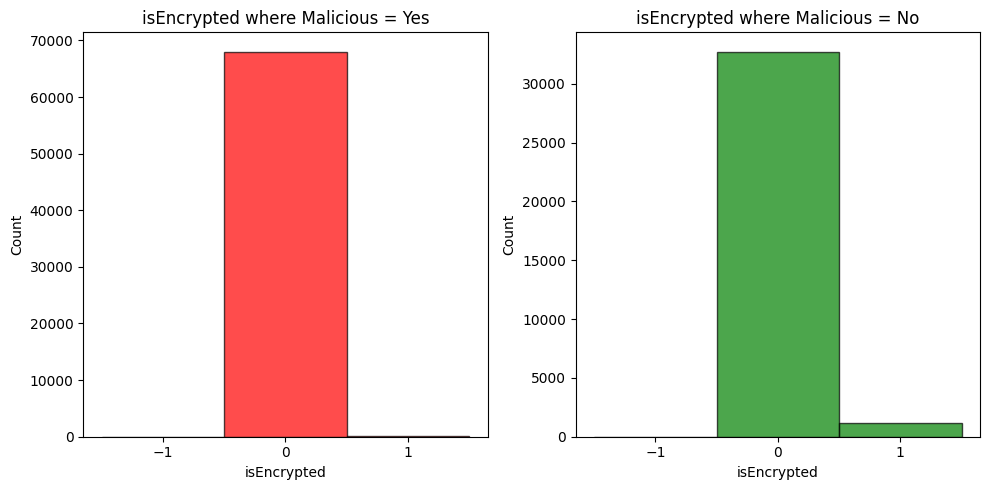

In [13]:
malicious_yes = temp[temp['Malicious'] == 'Yes']['isEncrypted']
malicious_no = temp[temp['Malicious'] == 'No']['isEncrypted']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(malicious_yes, bins=[-1.5, -0.5, 0.5, 1.5], color='red', edgecolor='black', alpha=0.7)
ax1.set_title('isEncrypted where Malicious = Yes')
ax1.set_xlabel('isEncrypted')
ax1.set_ylabel('Count')
ax1.set_xticks([-1, 0, 1])

ax2.hist(malicious_no, bins=[-1.5, -0.5, 0.5, 1.5], color='green', edgecolor='black', alpha=0.7)
ax2.set_title('isEncrypted where Malicious = No')
ax2.set_xlabel('isEncrypted')
ax2.set_ylabel('Count')
ax2.set_xticks([-1, 0, 1])

plt.tight_layout()
plt.show()

# Analysis of "contains text" Column

In [14]:
temp['contains text'].value_counts()

contains text
Yes        60707
No         36213
unclear     5124
Name: count, dtype: int64

In [16]:
temp[temp['Malicious'] == 'Yes']['contains text'].value_counts()

contains text
No         33657
Yes        29337
unclear     5122
Name: count, dtype: int64

In [17]:
temp[temp['Malicious'] == 'No']['contains text'].value_counts()

contains text
Yes        31370
No          2556
unclear        2
Name: count, dtype: int64

## Analysis of Header Column

In [32]:
temp['header'].value_counts()

header
%PDF-1.4     40338
%PDF-1.6     24418
%PDF-1.3     18709
%PDF-1.2      6023
%PDF-1.5      5860
%PDF-1.7      3561
%PDF-1.1      1228
%PDF-1.0       972
Malformed      935
Name: count, dtype: int64

In [34]:
temp[temp['Malicious'] == 'Yes']['header'].value_counts()

header
%PDF-1.4     27883
%PDF-1.6     21472
%PDF-1.3     11666
%PDF-1.5      3283
%PDF-1.7      1396
Malformed      934
%PDF-1.0       869
%PDF-1.1       413
%PDF-1.2       200
Name: count, dtype: int64

In [35]:
temp[temp['Malicious'] == 'No']['header'].value_counts()

header
%PDF-1.4     12455
%PDF-1.3      7043
%PDF-1.2      5823
%PDF-1.6      2946
%PDF-1.5      2577
%PDF-1.7      2165
%PDF-1.1       815
%PDF-1.0       103
Malformed        1
Name: count, dtype: int64

C:\Users\Himanshu Shekhar\AppData\Local\Temp\ipykernel_31688\2312144001.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(malicious_yes.unique(), rotation=45, ha="right")
C:\Users\Himanshu Shekhar\AppData\Local\Temp\ipykernel_31688\2312144001.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(malicious_no.unique(), rotation=45, ha="right")


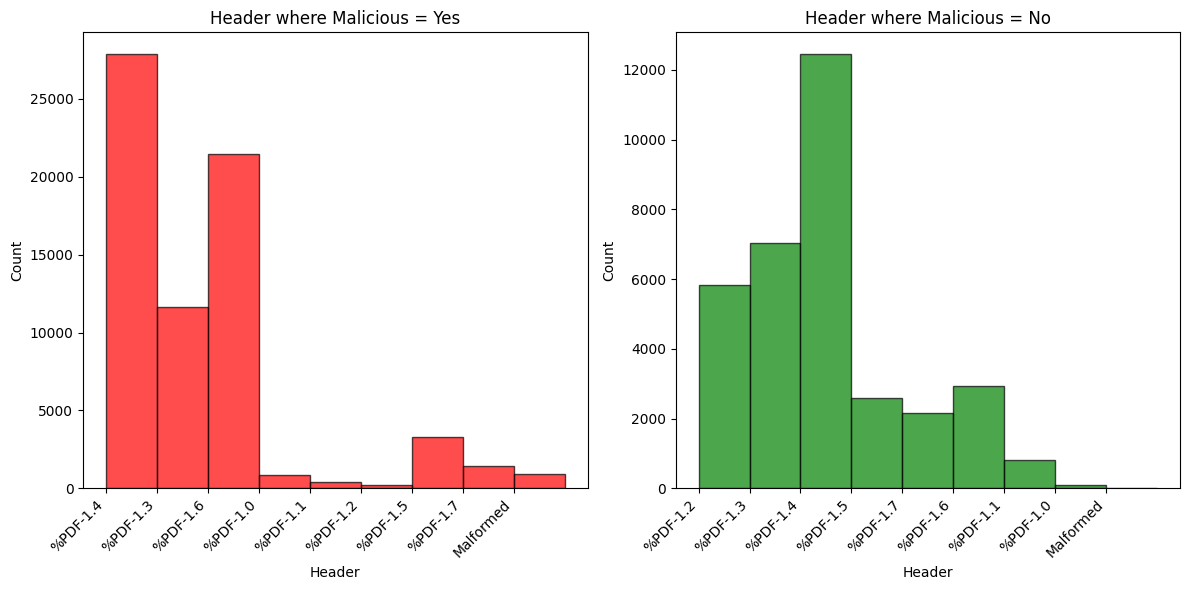

In [36]:
malicious_yes = temp[temp['Malicious'] == 'Yes']['header']
malicious_no = temp[temp['Malicious'] == 'No']['header']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(malicious_yes, bins=range(len(malicious_yes.unique())+1), color='red', edgecolor='black', alpha=0.7)
ax1.set_title('Header where Malicious = Yes')
ax1.set_xlabel('Header')
ax1.set_ylabel('Count')
ax1.set_xticklabels(malicious_yes.unique(), rotation=45, ha="right")

ax2.hist(malicious_no, bins=range(len(malicious_no.unique())+1), color='green', edgecolor='black', alpha=0.7)
ax2.set_title('Header where Malicious = No')
ax2.set_xlabel('Header')
ax2.set_ylabel('Count')
ax2.set_xticklabels(malicious_no.unique(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [37]:
temp.columns

Index(['pdfsize', 'metadata size', 'pages', 'xref length', 'title characters',
       'isEncrypted', 'embedded files', 'images', 'contains text', 'header',
       'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref',
       'pageno', 'Encrypt', 'ObjStm', 'JS', 'JavaScript', 'AA', 'OpenAction',
       'AcroForm', 'JBIG2Decode', 'RichMedia', 'Launch', 'EmbeddedFile', 'XFA',
       'URI', 'Colors', 'JS_Obfuscated', 'JavaScript_Obfuscated',
       'AA_Obfuscated', 'OpenAction_Obfuscated', 'AcroForm_Obfuscated',
       'JBIG2Decode_Obfuscated', 'RichMedia_Obfuscated', 'Launch_Obfuscated',
       'EmbeddedFile_Obfuscated', 'XFA_Obfuscated', 'pageno_Obfuscated',
       '%EOF', '/Producer', '/ProcSet', '/ID', '/S', '/CreationDate', '/Font',
       '/XObject', '/Widget', '/FontDescriptor', '/Rect', '/ModDate', '/Info',
       '/XML', 'dict_start', 'dict_end', 'comments', 'Malicious'],
      dtype='object')

## Analysis of Obfuscated Columns

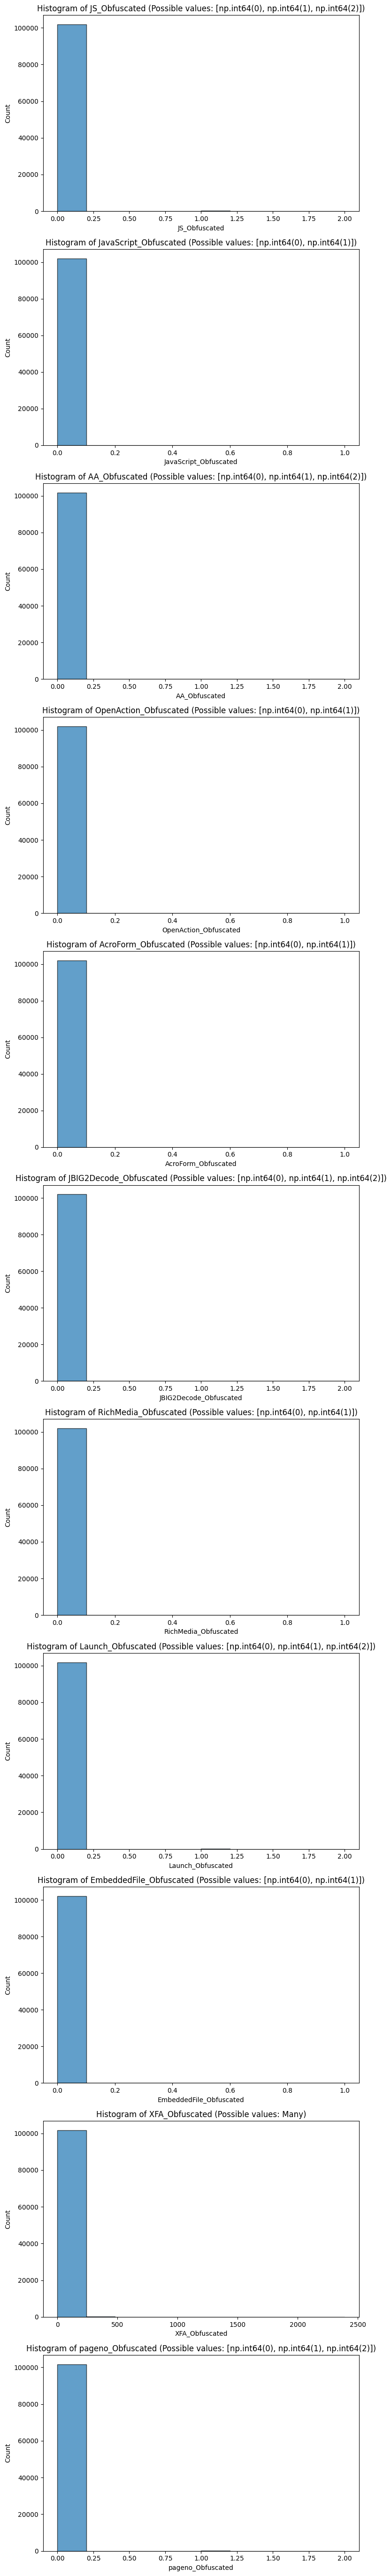

In [38]:
# Get columns that end with '_Obfuscated'
obfuscated_columns = [col for col in temp.columns if col.endswith('_Obfuscated')]

# Create a figure with subplots (one for each '_Obfuscated' column)
num_cols = len(obfuscated_columns)
fig, axes = plt.subplots(nrows=num_cols, figsize=(8, 5 * num_cols))

# If there's only one column, axes might not be iterable, so handle that case
if num_cols == 1:
    axes = [axes]

# Plot a histogram for each obfuscated column
for ax, col in zip(axes, obfuscated_columns):
    unique_values = temp[col].unique()
    ax.hist(temp[col], bins=10, edgecolor='black', alpha=0.7)
    
    # Set the title to include the unique values
    values = sorted(unique_values)
    if(len(values)>5):
        values = "Many"
    ax.set_title(f'Histogram of {col} (Possible values: {values})')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

# Analysis of JBIG2Decode Column

In [18]:
temp['JBIG2Decode'].value_counts()

JBIG2Decode
0    101701
1       333
2         8
4         2
Name: count, dtype: int64

In [19]:
temp[temp['Malicious'] == 'Yes']['JBIG2Decode'].value_counts()

JBIG2Decode
0    67773
1      333
2        8
4        2
Name: count, dtype: int64

In [21]:
temp[temp['Malicious'] == 'No']['JBIG2Decode'].value_counts()

JBIG2Decode
0    33928
Name: count, dtype: int64